In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Here we import out Data file for training the model

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Projects/Laptop Price Predictor/Data Used for training purpose.csv",encoding='latin')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# We drop laptop_ID column because it is not useful
df.drop(columns=['laptop_ID'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [10]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [11]:
df.duplicated().sum()

28

In [12]:
# Droping duplicate values
df.drop_duplicates(inplace=True)

#Now we start EDA (Exploratory Data Analysis)

In [13]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<Axes: >

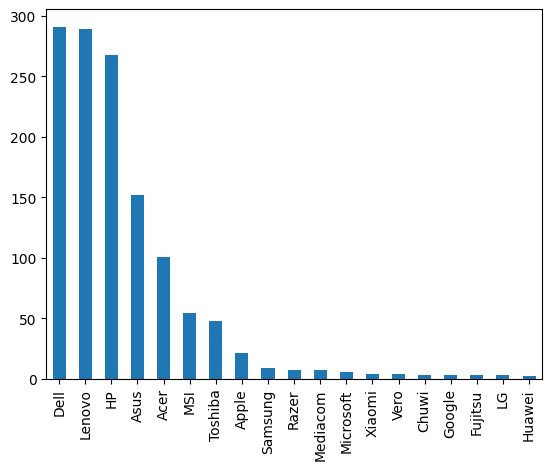

In [14]:
df['Company'].value_counts().plot(kind='bar')

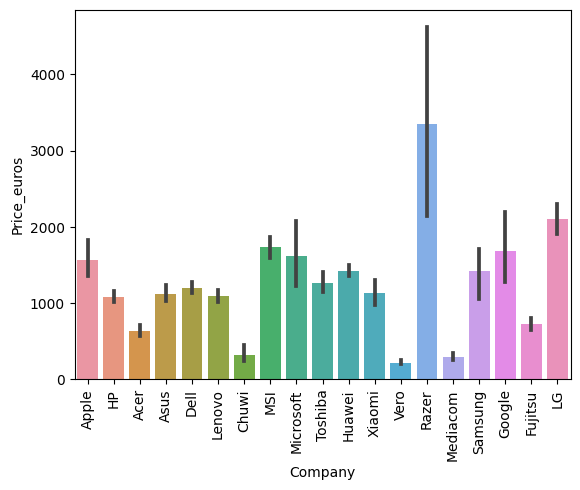

In [15]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Product'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Product, Length: 618, dtype: int64

This column is Showing so much variation like we see length is 618 , so we drop it because its too difficult to analyse it

In [17]:
df.drop(columns=['Product'],inplace=True)

In [18]:
df['Inches'].value_counts()

15.6    647
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

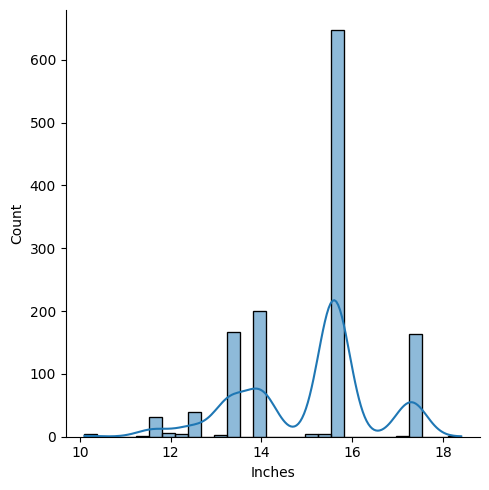

In [19]:
sns.displot(x=df['Inches'],kde=True)

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

We remove take information from this column like screen is touchscreen or not , IPS , and resolution

In [21]:
(lambda x:x.split()[-1].split('x')[0])("IPS Panel Touchscreen 2400x1600")

'2400'

In [22]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1270     IPS Panel Full HD / Touchscreen 1920x1080
1271    IPS Panel Quad HD+ / Touchscreen 3200x1800
1272                                      1366x768
1273                                      1366x768
1274                                      1366x768
Name: ScreenResolution, Length: 1275, dtype: object

In [23]:
df['X_res']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[1]).astype('int')

In [24]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)

In [25]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,X_res,Y_res,Touchscreen,IPS
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,499.0,1920,1080,0,0
560,Acer,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25kg,349.0,1920,1080,1,1
945,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16GB,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.5kg,999.0,1920,1080,0,1


Now we drop this column because we extracted all the information important

In [26]:
df.drop(columns=['ScreenResolution'],inplace=True)

We above see column of inch and resolutions , now we use this information and make another column of PPI (Pixels Per Inches)

In [27]:
df['PPI']=round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'],0)

In [28]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,X_res,Y_res,Touchscreen,IPS,PPI
661,Lenovo,Notebook,15.6,Intel Celeron Dual Core N3350 1.1GHz,4GB,500GB HDD,Intel HD Graphics 500,Windows 10,2.2kg,419.0,1366,768,0,0,100.0


Now we drop columns which are used above to make PPI columns

In [29]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [30]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
342,HP,Notebook,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.1kg,716.0,0,1,141.0


In [31]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

We perform some funtions in this column to reduce the number of variables

In [32]:
(lambda x:" ".join(x.split()[0:3]))("Intel Core i5 8250U 1.6GHz")

'Intel Core i5'

In [33]:
df['Cpu']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [34]:
df['Cpu'].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           70
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
AMD A6-S

In [35]:
def fetch_cpu_name(text):
  if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core M":
    return text
  elif text.split()[0]=='Intel':
    return " ".join(text.split()[0:2])
  else:
    return "AMD Processor"

In [36]:
df['Cpu']=df['Cpu'].apply(fetch_cpu_name)

<Axes: >

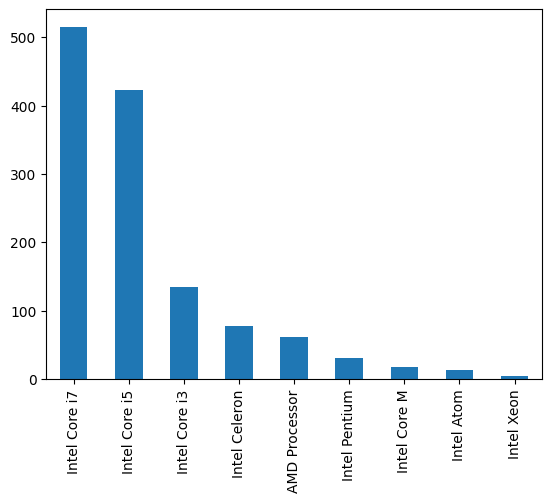

In [37]:
df['Cpu'].value_counts().plot(kind='bar')

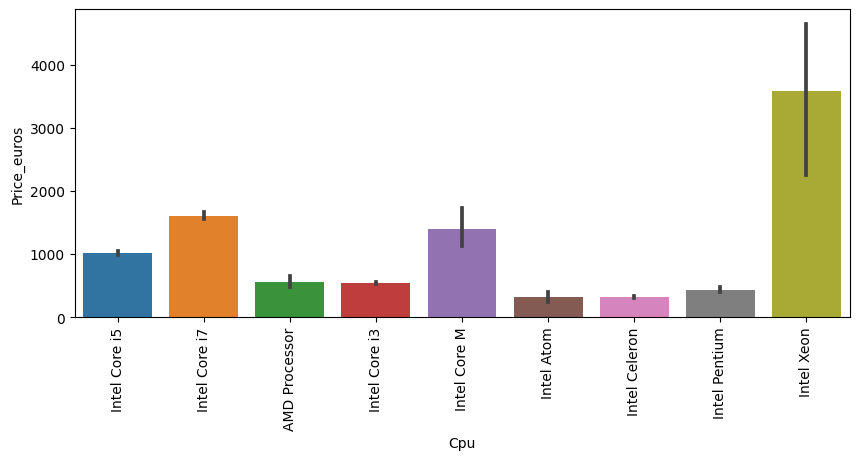

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['Cpu'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [39]:
df['Ram']=df['Ram'].apply(lambda x:x.replace("GB","")).astype('int')

In [40]:
df['Ram'].value_counts()

8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

<Axes: >

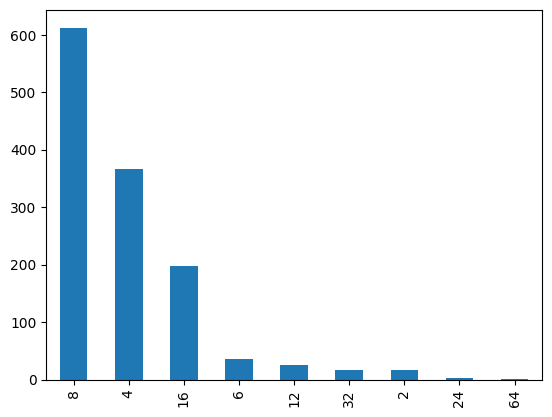

In [41]:
df['Ram'].value_counts().plot(kind='bar')

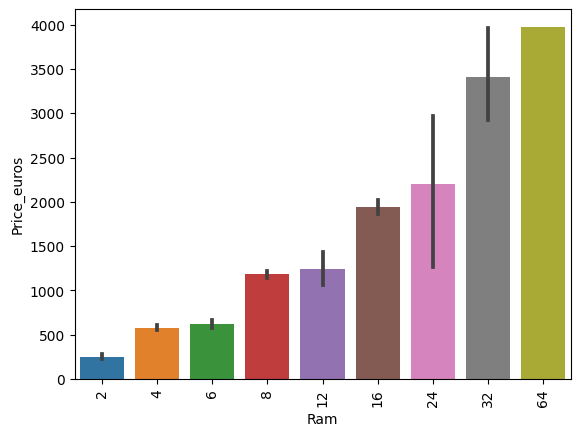

In [42]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [43]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

This column is so difficult to analyse we see it have SSD , HDD , variation in memory and more . HERE we remove this column

In [44]:
df.drop(columns=['Memory'],inplace=True)

In [45]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [46]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [47]:
df['Gpu'].value_counts()

Intel     704
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [48]:
df=df[df['Gpu']!='ARM']

In [49]:
df['Gpu'].value_counts()

Intel     704
Nvidia    396
AMD       174
Name: Gpu, dtype: int64

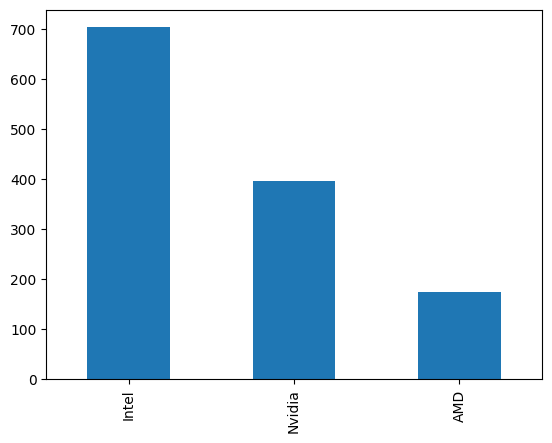

In [50]:
df['Gpu'].value_counts().plot(kind='bar')
plt.show()

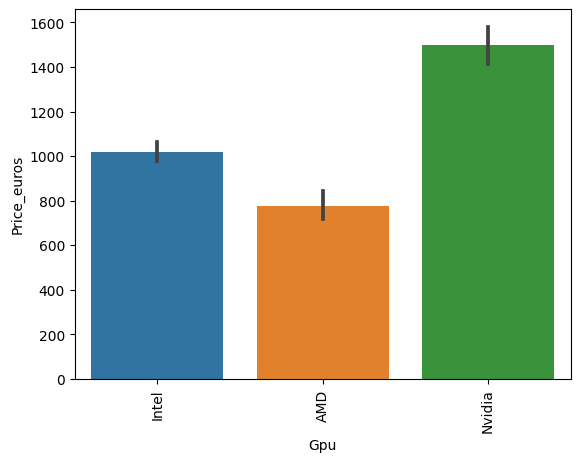

In [51]:
sns.barplot(x=df['Gpu'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [52]:
df['OpSys'].value_counts()

Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [53]:
def os(text):
  if text=="Windows 10" or text=="Windows 10 S":
    return "Windows"
  elif text=="Mac OS X" or text=="macOS":
    return "Mac"
  else:
    return "Other OS/Linux/No OS"

In [54]:
df['OpSys']=df['OpSys'].apply(os)

<ipython-input-54-1a89346e0b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']=df['OpSys'].apply(os)


In [55]:
df['OpSys'].value_counts()

Windows                 1056
Other OS/Linux/No OS     197
Mac                       21
Name: OpSys, dtype: int64

<Axes: >

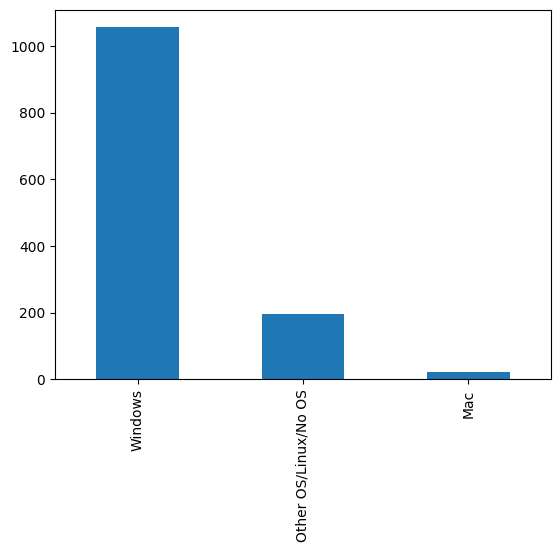

In [56]:
df['OpSys'].value_counts().plot(kind='bar')

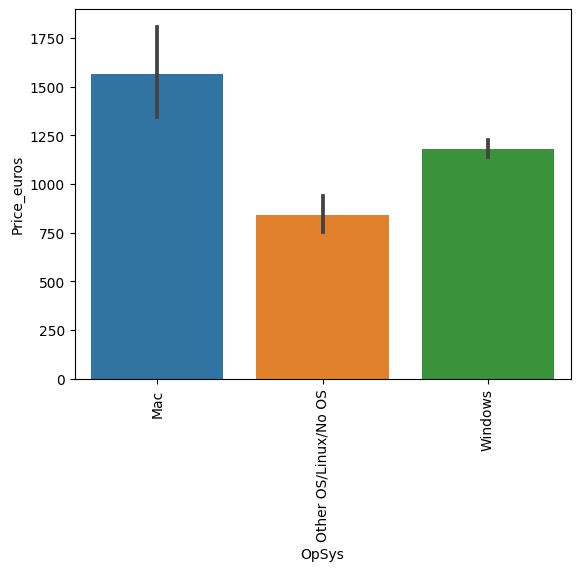

In [57]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [58]:
df['Weight']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

<ipython-input-58-d0238b158d02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')


In [59]:
df['Weight'].value_counts()

2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: Weight, Length: 171, dtype: int64

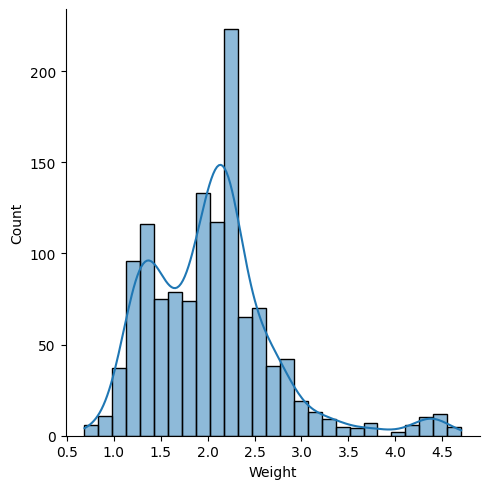

In [60]:
sns.displot(x=df['Weight'],kde=True)

In [61]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
1054,Dell,Ultrabook,Intel Core i7,16,Intel,Windows,1.2,2254.0,1,0,276.0


In [62]:
df['Touchscreen'].value_counts()

0    1087
1     187
Name: Touchscreen, dtype: int64

<Axes: >

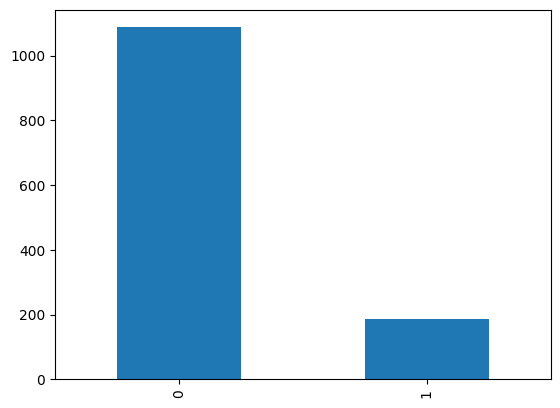

In [63]:
df['Touchscreen'].value_counts().plot(kind='bar')

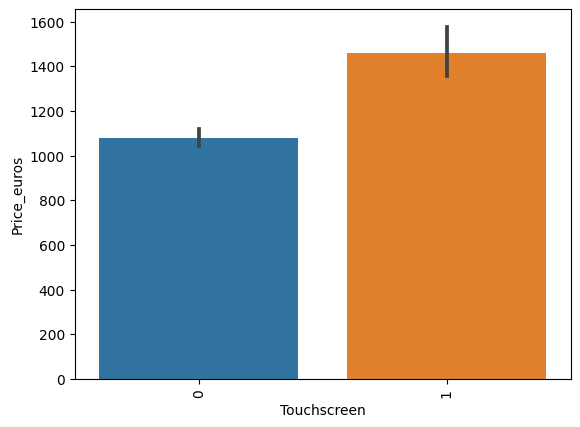

In [64]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

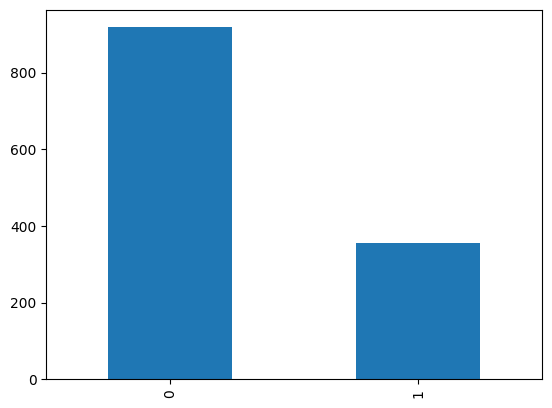

In [65]:
df['IPS'].value_counts().plot(kind='bar')

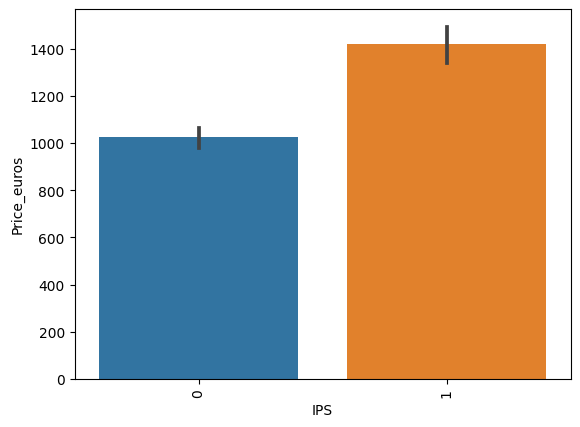

In [66]:
sns.barplot(x=df['IPS'],y=df['Price_euros'])
plt.xticks(rotation=90)
plt.show()

In [67]:
df['PPI'].value_counts()

141.0    426
100.0    198
157.0    131
127.0    131
166.0    108
112.0     43
135.0     29
176.0     25
276.0     25
282.0     23
106.0     22
210.0     18
125.0      9
118.0      8
331.0      7
255.0      7
227.0      6
201.0      6
226.0      6
221.0      6
147.0      4
352.0      4
224.0      4
158.0      4
128.0      4
235.0      4
317.0      2
200.0      2
91.0       2
170.0      2
190.0      2
120.0      1
111.0      1
267.0      1
162.0      1
108.0      1
195.0      1
Name: PPI, dtype: int64

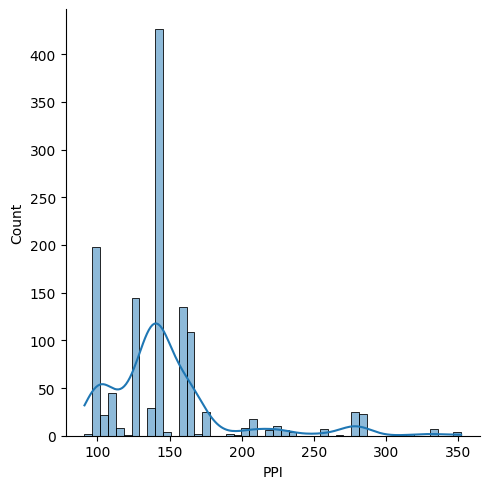

In [68]:
sns.displot(x=df['PPI'],kde=True)

In [69]:
df['Price_euros']

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1274, dtype: float64

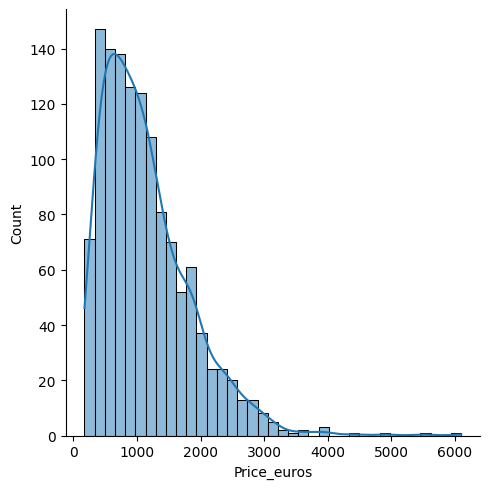

In [70]:
sns.displot(x=df['Price_euros'],kde=True)

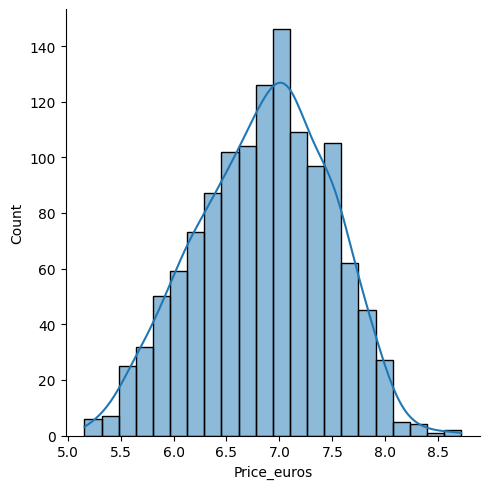

In [71]:
sns.displot(x=np.log(df['Price_euros']),kde=True)

# Now we split the data in input(X) and output(Y) form

In [72]:
X=df.drop(columns=['Price_euros'])
y=np.log(df['Price_euros'])

In [73]:
X.shape

(1274, 10)

In [74]:
y.shape

(1274,)

# Spliting the data for training and testing purpose

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [77]:
X_train.shape

(1082, 10)

In [78]:
X_test.shape

(192, 10)

In [79]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,PPI
21,Lenovo,Gaming,Intel Core i5,8,Nvidia,Windows,2.50,0,1,141.0
790,Asus,Gaming,Intel Core i7,8,Nvidia,Windows,2.24,0,0,141.0
273,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel,Windows,1.36,1,0,210.0
397,Lenovo,Notebook,Intel Core i5,8,Intel,Windows,1.90,0,1,157.0
921,HP,Ultrabook,Intel Core i7,8,AMD,Windows,1.84,0,0,141.0
...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,Intel Core i3,4,Nvidia,Windows,2.20,0,0,100.0
299,Asus,Ultrabook,Intel Core i7,16,Nvidia,Windows,1.63,0,0,141.0
493,Acer,Notebook,AMD Processor,8,AMD,Windows,2.20,0,0,100.0
527,Lenovo,Notebook,Intel Core i3,8,Nvidia,Other OS/Linux/No OS,2.20,0,0,100.0


In [80]:
X.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,PPI
302,Lenovo,Notebook,Intel Core i5,6,Nvidia,Windows,2.8,0,0,106.0


In [81]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
18,Lenovo,Notebook,Intel Core i3,8,Nvidia,Other OS/Linux/No OS,2.2,499.0,0,0,141.0


# Importing diffrent Models to check Accuracy

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [83]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [84]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8086740031745416
MAE:  0.20951493245724243
MSE:  0.06850684315118029


# 80.86 % Accuracy

In [85]:
# Lasso Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8069454329895952
MAE:  0.21061410861174745
MSE:  0.06912578092493175


# 80.69 % Accuracy

In [86]:
# Ridge Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8002682248195013
MAE:  0.21319515101205896
MSE:  0.07151664500188049


# 80.02 % Accuracy

In [87]:
# KNN Regression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8107094839790084
MAE:  0.19672547470869403
MSE:  0.06777801190753041


# 81.07 % Accuracy

In [88]:
# DecisionTreeRegressor / Regression Trees
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.7894987149521011
MAE:  0.2127773679505254
MSE:  0.0753728126714217


# 78.94 % Accuracy

In [89]:
# AdaBoostRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=100)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.7784604898757866
MAE:  0.2353658309767743
MSE:  0.0793251974310336


# 77.78 % Accuracy

In [90]:
# GradientBoostingRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8680365085844998
MAE:  0.16977750067102995
MSE:  0.047251300701864986


# 86.79 % Accuracy

In [91]:
# Support Vector Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.842553692654029
MAE:  0.1880332427149146
MSE:  0.05637576524387781


# 84.25 % Accuracy

In [92]:
# XGB Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=XGBRegressor(n_estimators=50)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8804511869764834
MAE:  0.1582505367586057
MSE:  0.042806058343358676


# 86.40 % Accuracy

In [93]:
# Random Forest Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=50)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8591608646339661
MAE:  0.1721586779272469
MSE:  0.05042934424050458


# 86.62 % Accuracy
This model shows maximum accuracy , that's why we are using this model for our project

In [94]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [95]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


# Making App

In [96]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

#Import the model
df=pickle.load(open('df.pkl','rb'))
pipe=pickle.load(open('pipe.pkl','rb'))

st.title("Laptop Price Predictor")
company=st.selectbox("Brand",df['Company'].unique(),index=4)
type=st.selectbox("Type",df['TypeName'].unique(),index=1)
cpu=st.selectbox("Cpu",df['Cpu'].unique(),index=0)
ram=st.selectbox("Ram",[2,4,6,8,12,16,24,32,64,128],index=3)
gpu=st.selectbox("Gpu",df['Gpu'].unique(),index=0)
os=st.selectbox("Os",df['OpSys'].unique(),index=2)
weight=st.number_input("Weight(in kg)",min_value=0.6,max_value=4.7,value=2.0,step=0.1)
touchscreen=st.selectbox("Touchscreen",['Yes','No'])
ips=st.selectbox("ips",['Yes','No'])
screen_size=st.number_input("Screen size(in Inches),calculated diagonally",
min_value=10.0,max_value=18.5,value=15.6,step=0.1)
resolution=st.selectbox("Screen Resolution",['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768', '2304x1440',
 '3200x1800', '1920x1200', '2256x1504', '3840x2160', '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],index=2)

if st.button("PREDICT"):
  ppi=None
  if(touchscreen=='Yes'):
    touchscreen=1
  else:
    touchscreen=0
  if (ips=='Yes'):
    ips=1
  else:
    ips=0
  X_res=int(resolution.split('x')[0])
  Y_res=int(resolution.split('x')[1])
  ppi=((X_res**2)+(Y_res**2))**0.5/screen_size
  query=np.array([[company,type,cpu,ram,gpu,os,weight,touchscreen,ips,ppi]])
  op=np.exp(pipe.predict(query))
  st.subheader("The predicted price of the laptop for the above configuration is "+str(round(op[0]))+" pounds.")
  st.text("Thanks For Using , Presented By Pranshu Tomer")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.44.247:8501

npx: installed 22 in 6.361s
your url is: https://breezy-bags-win.loca.lt
